In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def MSE(output, target):
    loss = torch.mean((output - target)**2)
    return loss

In [32]:
class RecurrentCell(torch.nn.Module):
    def __init__(self, dt=0.001):
        super(RecurrentCell, self).__init__()
        self.params = torch.nn.Parameter(data = torch.tensor([10, 8/3, 28],dtype=torch.float32))
        self.dt = dt

    def forward(self, input_data, hidden_state):
        sigma, beta, rho = self.params
        x,y,z = hidden_state
        dx, dy, dz = sigma*(y-x), x*(rho-z) -y, x*y - beta*z
        return torch.stack([x+dx*self.dt, y+dy*self.dt, z+dz*self.dt])

class RecurrentNetwork(nn.Module):
    def __init__(self,dt=0.001):
        super(RecurrentNetwork, self).__init__()
        self.RCell = RecurrentCell(dt=dt)

    def forward(self, input):
        outputs = []
        h_t = torch.tensor([-8,7,27],dtype=torch.float32)
        for i, input_t in enumerate(input):
            h_t = self.RCell(None, h_t)
            outputs += [h_t]
        
        outputs = torch.stack(outputs)
        return outputs

In [33]:
Rnn = RecurrentNetwork()
times = torch.arange(0,1,0.001)
outs = Rnn(times)

Text(0.5, 0.92, 'Lorenz Attractor')

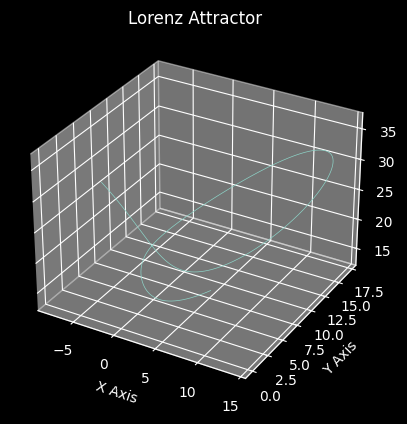

In [34]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*outs.detach().numpy().T,lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

tensor([[-7.8500,  7.1877, 26.1880],
        [-7.6996,  7.3651, 25.3983],
        [-7.5490,  7.5328, 24.6304],
        ...,
        [ 6.8314,  6.8313,  1.6667],
        [ 6.8314,  6.8313,  1.6667],
        [ 6.8314,  6.8313,  1.6667]], grad_fn=<StackBackward0>)

In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Train the network

for epoch in range(epochs):
    for batch, (data, target) in enumerate(train_loader):
        # Obtaining the cuda parameters
        data = data.to(device=device)
        target = target.to(device=device)

        # Reshaping to suit our model
        data = data.reshape(data.shape[0], -1)

        # Forward propagation
        score = model(data)
        loss = criterion(score, target)

        # Backward propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [2]:
@jit(nopython=True)
def f(x,t,sigma=10, beta=8/3,rho=28):
    X,Y,Z = x
    return np.array([sigma*(Y-X), X*(rho-Z)-Y, X*Y - (beta*Z)])
@jit(nopython=True)aaaaa
def g(x,t):
    return np.zeros(3)

In [3]:
dt = 0.001
times = np.arange(0,100,dt)
x0=np.array([-8,7,27])
xx1 = integrate(f,g,x0,times,dt,mode="euler")
xx2 = integrate(f,g,x0,times,dt,mode="RK4")

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

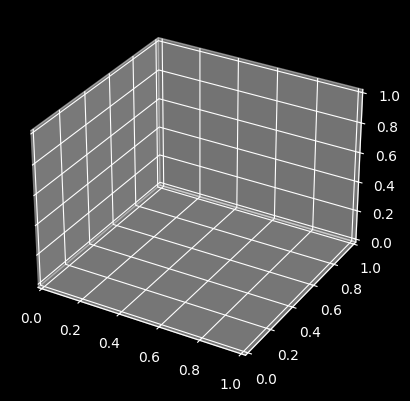

In [9]:
import os 

os.makedirs("data/trajs/lorenz/",exist_ok=True)
np.save("data/trajs/lorenz/1",xx1)